# n-grams

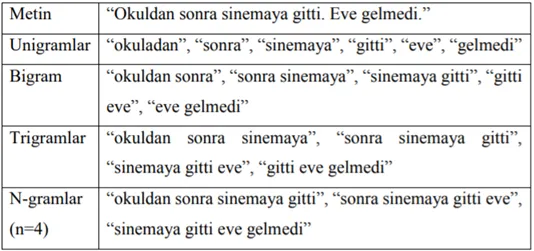

N-gram, bir dil veya metin içinde ardışık olarak kullanılan n adet öğenin (kelimelerin, karakterlerin veya başka bir birim) kombinasyonunu ifade eden bir kavramdır. Bir metnin içerdiği dil örüntülerini ve bağlamları anlamak veya metin üzerinde tahminlerde bulunmak için kullanılır.

Kelimeler arasındaki ilişkiyi anlamak için kullanırız. Tek kelimenin yerini değiştirerek bütün anlamı değiştirebiliriz bu nednden kelimelerin hangi sıra ile geldiği önemlidir.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()
v.fit(["Dr Hamilton is waiting for a job"])
v.vocabulary_

{'dr': 0, 'hamilton': 2, 'is': 3, 'waiting': 5, 'for': 1, 'job': 4}

In [2]:
v=CountVectorizer(ngram_range=(2,2))
v.fit(["Dr Hamilton is waiting for a job"])
v.vocabulary_

{'dr hamilton': 0,
 'hamilton is': 2,
 'is waiting': 3,
 'waiting for': 4,
 'for job': 1}

In [3]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(["Dr Hamilton is waiting for a job"])
v.vocabulary_

{'dr': 0,
 'hamilton': 5,
 'is': 8,
 'waiting': 12,
 'for': 3,
 'job': 11,
 'dr hamilton': 1,
 'hamilton is': 6,
 'is waiting': 9,
 'waiting for': 13,
 'for job': 4,
 'dr hamilton is': 2,
 'hamilton is waiting': 7,
 'is waiting for': 10,
 'waiting for job': 14}

In [4]:
v=CountVectorizer(ngram_range=(2,4))
v.fit(["Dr Hamilton is waiting for a job"])
v.vocabulary_

{'dr hamilton': 0,
 'hamilton is': 4,
 'is waiting': 7,
 'waiting for': 10,
 'for job': 3,
 'dr hamilton is': 1,
 'hamilton is waiting': 5,
 'is waiting for': 8,
 'waiting for job': 11,
 'dr hamilton is waiting': 2,
 'hamilton is waiting for': 6,
 'is waiting for job': 9}

In [5]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [6]:
import spacy

nlp=spacy.load("en_core_web_sm")

#önişleme fonksiyonu
def preprocess(text):
    doc=nlp(text)
    
    filtre_tokrns = []
    
    for token in doc:
        if token.is_stop or token.is_punct:#stop words veya noktalama işareti
            continue
        filtre_tokrns.append(token.lemma_)
        #token.lemma_ bir kelimenin temel formuna dönüştürülmesi işlemidir.
        
    return " ".join(filtre_tokrns)

In [7]:
preprocess("Thor ate pizza ? ")

'thor eat pizza'

In [8]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [9]:
corpus_processed = [ preprocess(text) for text in corpus ]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [10]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [11]:
v.transform(["Thor eat pizza"]).toarray()
#verilen metin belgesini vektöre dönüştürmek için kullanılır

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [12]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 8,
 'eat': 0,
 'pizza': 6,
 'thor eat': 9,
 'eat pizza': 1,
 'thor eat pizza': 10,
 'loki': 2,
 'tall': 7,
 'loki tall': 5,
 'loki eat': 3,
 'loki eat pizza': 4}

In [13]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]], dtype=int64)

**News Category Classification Problem**

Burada bir haber kategorisi sınıflandırması yapılmakta. Herhangi bir haberi aşağıdaki kategorilerden birine sınıflandırabilen bir n-gram yapılacak

BUSINESS
SPORTS
CRIME
SCIENCE


In [14]:
import pandas as pd

df = pd.read_json('news_dataset.json')

In [15]:
df.head(13)

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
5,Trump Pays Penalty For Ethically Questionable ...,BUSINESS
6,LIVE: Argentina vs. Iran,SPORTS
7,9 Tips for Making Your Blog Better in 2015 New...,BUSINESS
8,Man Arrested Over Threats To CNN: 'Fake News....,CRIME
9,Here's Why Coffee Makes You Have To Poop It hi...,SCIENCE


In [16]:
df.shape

(12695, 2)

In [17]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

kategoriler arasındaki dengesizliği ortadan kaldırmak için

In [18]:
min_samples = 1381 

In [19]:
df[df.category=="BUSINESS"]

,text,category
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
5,Trump Pays Penalty For Ethically Questionable ...,BUSINESS
7,9 Tips for Making Your Blog Better in 2015 New...,BUSINESS
10,This Is The First 10 Years Of Your Career You ...,BUSINESS
...,...,...
12682,"56 Successful Business Leaders, Including Repu...",BUSINESS
12685,Nearly Two-Thirds Of Marketers Are Not Giving ...,BUSINESS
12687,"Get Even I was in debt. Serious debt. The ""how...",BUSINESS
12688,Basic Premise of Social Integration Easy for u...,BUSINESS


In [20]:
df_business =df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_business

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
4963,"Interview With Amanda Barbara of Pubslush, Cro...",BUSINESS
589,Welcome to the Age of Context-Driven Sales and...,BUSINESS
687,Crude Oil Train Derails In Montana An oil trai...,BUSINESS
2961,Helping a Person Live Like They Were Dying Lor...,BUSINESS


In [21]:
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [22]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)

In [23]:
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [24]:
df_balanced.head()

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS


In [25]:
df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3
})
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, df_balanced.category_num, 
    test_size=0.2,
    random_state=2022,
    # Rastgele bölme işleminin tekrarlanabilirliğini sağlamak için kullanılan bir rastgele durum.
    stratify=df_balanced.category_num
    # Kategori sayılarına göre stratejik bölme yapar. Bu, her kategoriye ait örnek sayısının eğitim ve test setlerinde korunmasına yardımcı olur.
)

In [27]:
X_train.shape

(4419,)

In [28]:
X_train.head()

7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [29]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [30]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
clf=Pipeline([
    ('vectorizer_bow',CountVectorizer()), 
    ('nb', MultinomialNB())  
])
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [34]:
clf=Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,2))), 
    ('nb', MultinomialNB())  
])
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [35]:
clf=Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,3))), 
    ('nb', MultinomialNB())  
])
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [38]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [39]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [40]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)